# Initialize the accelerator

In [ ]:
import driver  # the generated driver

# Load accelerator
accel = driver.load_accelerator()

## Inspect Input/Output

In [ ]:
print("Expected input shape and datatype: %s %s" % (str(accel.ishape_normal()), str(accel.idt())))
print("Expected output shape and datatype: %s %s" % (str(accel.oshape_normal()), str(accel.odt())))

# Set the GTSRB Classes

In [ ]:
gtsrb_classes = [
    '20 Km/h', 
    '30 Km/h', 
    '50 Km/h', 
    '60 Km/h', 
    '70 Km/h', 
    '80 Km/h', 
    'End 80 Km/h', 
    '100 Km/h', 
    '120 Km/h', 
    'No overtaking', 
    'No overtaking for large trucks', 
    'Priority crossroad', 
    'Priority road', 
    'Give way', 
    'Stop', 
    'No vehicles', 
    'Prohibited for vehicles with a permitted gross weight over 3.5t including their trailers, and for tractors except passenger cars and buses', 
    'No entry for vehicular traffic', 
    'Danger Ahead', 
    'Bend to left', 
    'Bend to right', 
    'Double bend (first to left)', 
    'Uneven road', 
    'Road slippery when wet or dirty', 
    'Road narrows (right)', 
    'Road works', 
    'Traffic signals', 
    'Pedestrians in road ahead', 
    'Children crossing ahead', 
    'Bicycles prohibited', 
    'Risk of snow or ice', 
    'Wild animals', 
    'End of all speed and overtaking restrictions', 
    'Turn right ahead', 
    'Turn left ahead', 
    'Ahead only', 
    'Ahead or right only', 
    'Ahead or left only', 
    'Pass by on right', 
    'Pass by on left', 
    'Roundabout', 
    'End of no-overtaking zone', 
    'End of no-overtaking zone for vehicles with a permitted gross weight over 3.5t including their trailers, and for tractors except passenger cars and buses', 
    'Not a roadsign'
]

In [4]:
from finn_examples import models
accel = models.cnv_w1a1_gtsrb()

# Execute Inference and Extract Run-time

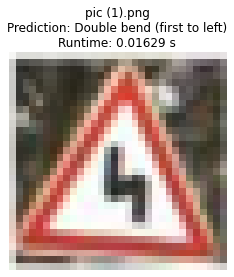

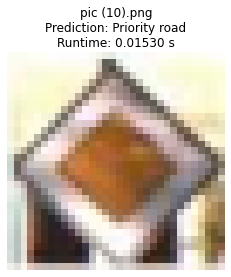

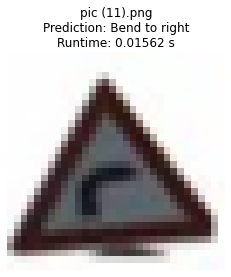

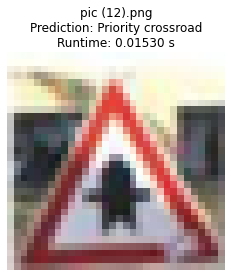

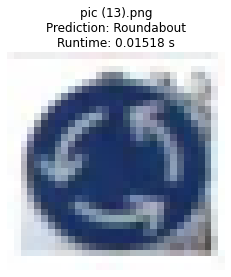

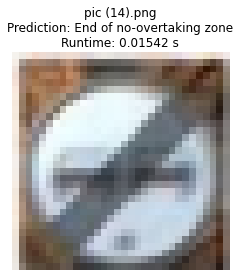

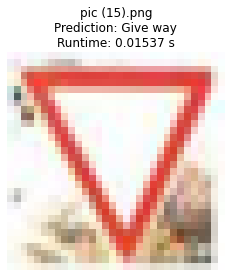

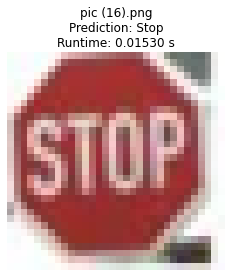

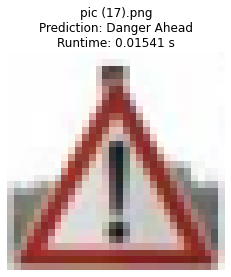

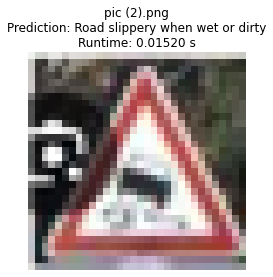

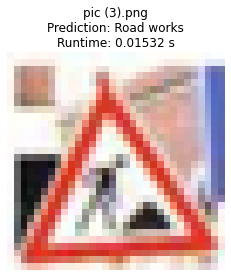

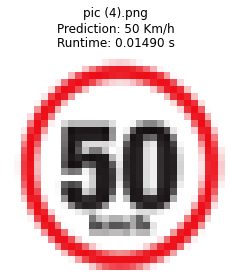

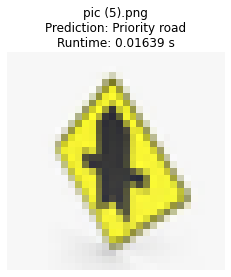

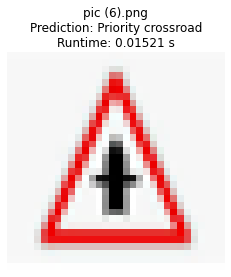

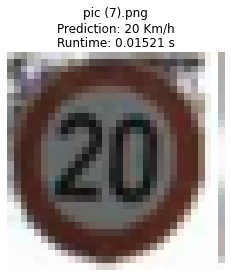

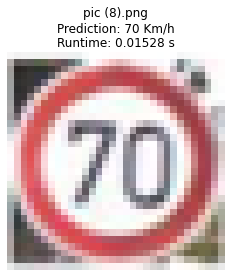

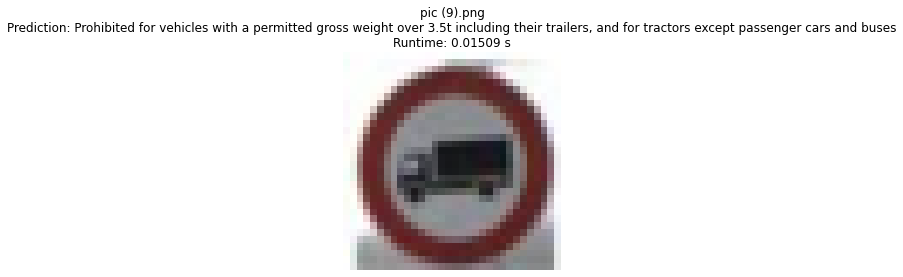

In [6]:
import os
import time
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Make sure accel and gtsrb_classes are already loaded from before

folder_path = "./test_pic"

# List all png images in the folder (sorted to keep order)
image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".png")])

for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    
    # Load image and convert to RGB
    img = Image.open(img_path).convert("RGB")
    
    # Resize to (32, 32)
    resized_img = img.resize((32, 32))
    
    # Convert to numpy array, uint8
    img_array = np.array(resized_img).astype(np.uint8)
    
    # Add batch dimension: (1, 32, 32, 3)
    input_array = img_array.reshape(1, 32, 32, 3)
    
    # Run accelerator and time it
    start_time = time.time()
    result = accel.execute(input_array)
    elapsed_time = time.time() - start_time
    
    # Get predicted class
    predicted_class = np.argmax(result)
    
    # Show image and print results
    plt.imshow(resized_img)
    plt.title(f"{img_file}\nPrediction: {gtsrb_classes[predicted_class]}\nRuntime: {elapsed_time:.5f} s")
    plt.axis('off')
    plt.show()
